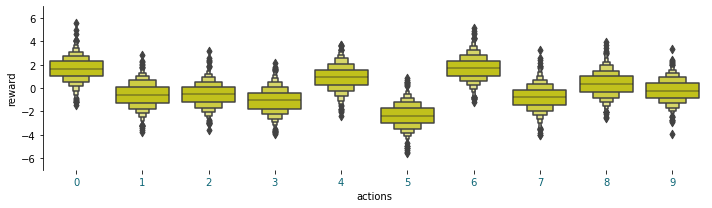

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(1)
qs = np.random.normal(loc=0, scale=1, size=(10))
d = np.array([np.random.normal(loc=qs[a], scale=1, size=1000) for a in range(10)])
df = pd.DataFrame(d.T).melt(var_name='actions', value_name='reward')

fig, ax = plt.subplots(1, figsize=(10, 3))
sns.boxenplot(x='actions', y='reward', data=df,  ax=ax, color='#dd0')
[ax.spines[pos].set_visible(False) for pos in ('right', 'bottom', 'top')];
[mt.set_color('#0c6575') for mt in ax.get_xmajorticklabels()];
[tl.set_color('none') for tl in ax.get_xticklines()];
ax.set(ylim=(-7,7));
plt.tight_layout()

In [3]:
class Model(object):
    def __init__(self, K, total_steps, n_parallel, epsilon, alpha_n, initial_q):
        self.K = K
        self.total_steps = total_steps
        self.rewards_t = np.zeros(total_steps)
        self.n_parallel = n_parallel
        self.epsilon = epsilon
        self.alpha_n = alpha_n
        
        self.qs = np.random.normal(loc=0, scale=1, size=(self.K, self.n_parallel))
        self.qt = np.ones(shape=(self.K, self.n_parallel)) * initial_q
        self.qn = np.zeros(shape=(self.K, self.n_parallel))
        self.na = np.zeros(shape=(self.K, self.n_parallel))
        self.timestep = 0
        

    def get_rewards(self, actions):
        return np.random.normal(loc=self.qs[actions, range(self.n_parallel)], scale=1, size=self.n_parallel)

    def update_qt(self, actions, rewards):
        self.qn[actions, range(self.n_parallel)] = self.qn[actions, range(self.n_parallel)] + np.ones(self.n_parallel)
        self.qt[actions, range(self.n_parallel)] = (self.qt[actions, range(self.n_parallel)] + self.alpha_n(self.qn[actions, range(self.n_parallel)]) *
                                                    (rewards - self.qt[actions, range(self.n_parallel)]))
        
    def do_initialization(self, init_steps):
        for step_index in range(init_steps):
            actions = np.ones(self.n_parallel).astype(np.int) * (step_index % self.K)
            rewards = self.get_rewards(actions)
            self.update_qt(actions, rewards)
            
    def select_actions(self):
        epsilol_selection = np.random.random(self.n_parallel)
        randomize_qt = self.qt + np.max(self.qt)/1e8 * np.random.random(self.qt.shape)
        actions = (epsilol_selection>self.epsilon) * np.argmax(randomize_qt, axis=0)
        actions = actions + (epsilol_selection<self.epsilon) * np.random.randint(self.K, size=self.n_parallel)
        return actions
    
    def do_step(self):
        actions = self.select_actions()
        rewards = self.get_rewards(actions)
        self.update_qt(actions, rewards)
        return rewards
    
    def run_simulation(self):
        for step_index in range(self.total_steps):
            self.timestep = self.timestep + 1
            rewards = self.do_step()
            self.rewards_t[step_index] = np.mean(rewards)
        return self

class UCB_Model(Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def select_actions(self):
        actions = np.argmax(self.qt + 2 * np.sqrt(np.log(self.timestep)/(self.qn)) , axis=0)
        return actions

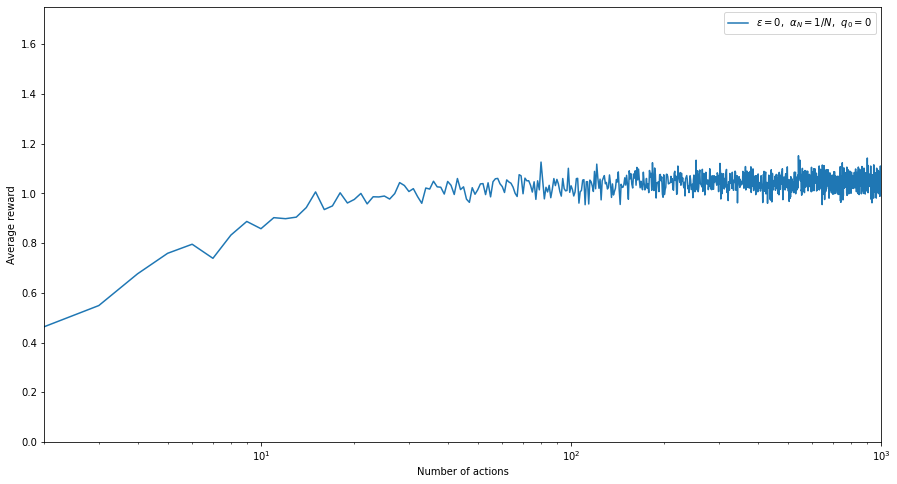

In [4]:
n_parallel = 1000
total_steps = 1000
K = 10
fig, ax = plt.subplots(1, figsize=(15, 8))

model = Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0, initial_q=0, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0$,  $\\alpha_N=1/N$,  $q_0=0$')

ax.set(xscale='log', xlim=(2, 1000))
ax.set(xlabel='Number of actions', ylabel='Average reward', ylim=(0,1.75))
ax.legend()

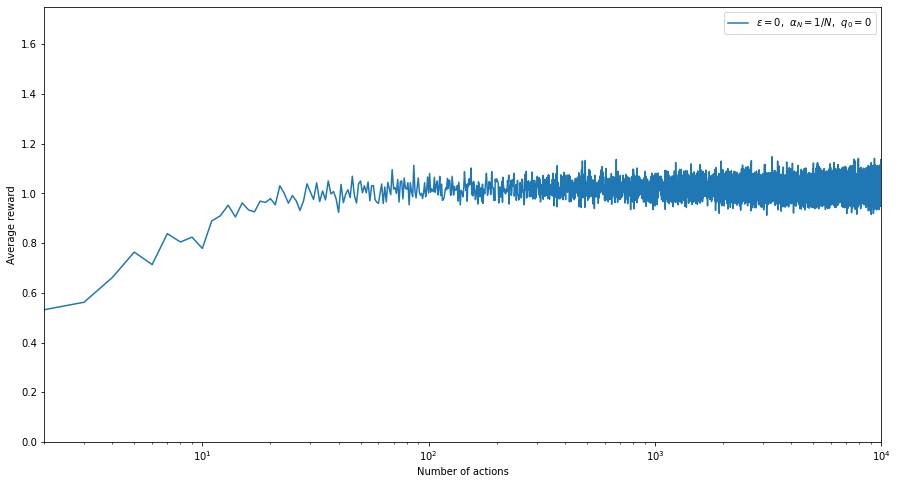

In [9]:
n_parallel = 1000
total_steps = 10000
K = 10
fig, ax = plt.subplots(1, figsize=(15, 8))

model = Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0, initial_q=0, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0$,  $\\alpha_N=1/N$,  $q_0=0$')

ax.set(xscale='log', xlim=(2, 10000))
ax.set(xlabel='Number of actions', ylabel='Average reward', ylim=(0,1.75))
ax.legend()

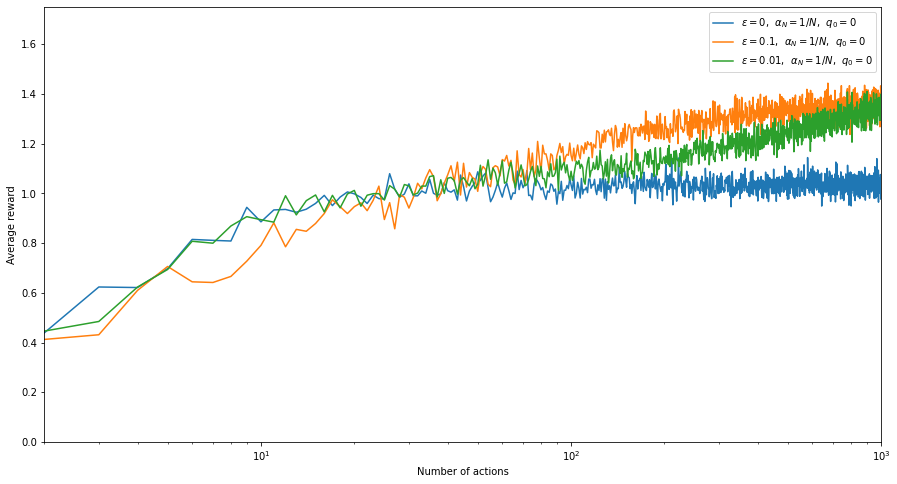

In [6]:
n_parallel = 1000
total_steps = 2000
K = 10
fig, ax = plt.subplots(1, figsize=(15, 8))

model = Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0, initial_q=0, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0$,  $\\alpha_N=1/N$,  $q_0=0$')

model = Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0.1, initial_q=0, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0.1$,  $\\alpha_N=1/N$,  $q_0=0$')

model = Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0.01, initial_q=0, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0.01$,  $\\alpha_N=1/N$,  $q_0=0$')

ax.set(xscale='log', xlim=(2, 2000))
ax.set(xlabel='Number of actions', ylabel='Average reward', ylim=(0,1.75))
ax.legend()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide


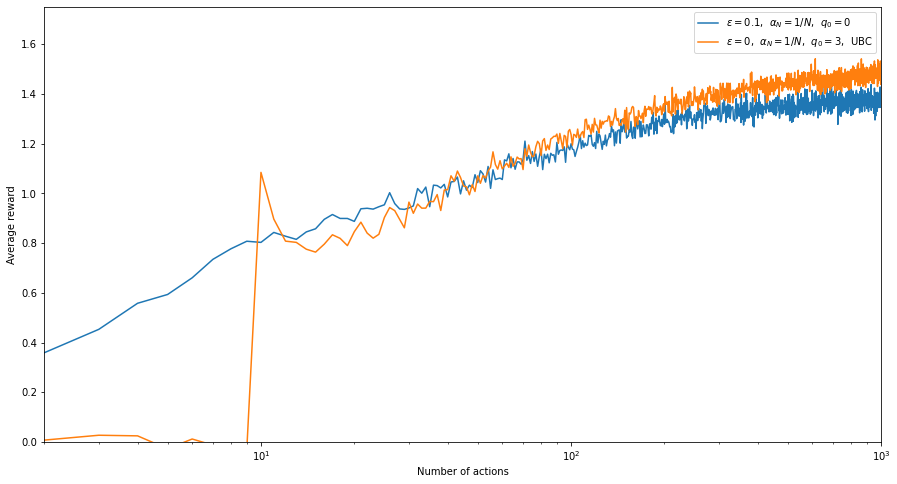

In [7]:
n_parallel = 2000
total_steps = 1000
K = 10
fig, ax = plt.subplots(1, figsize=(15, 8))

model = Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0.1, initial_q=0, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0.1$,  $\\alpha_N=1/N$,  $q_0=0$')

model = UCB_Model(K=K, total_steps=total_steps, n_parallel=n_parallel, epsilon=0, initial_q=2, alpha_n=lambda n:1/n).run_simulation()
ax.plot(model.rewards_t, label='$\\varepsilon=0$,  $\\alpha_N=1/N$,  $q_0=3$,  UBC')

ax.set(xscale='log', xlim=(2, 1000))
ax.set(xlabel='Number of actions', ylabel='Average reward', ylim=(0,1.75))
ax.legend()